In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

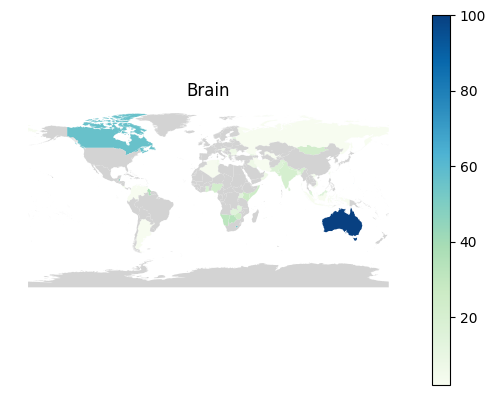

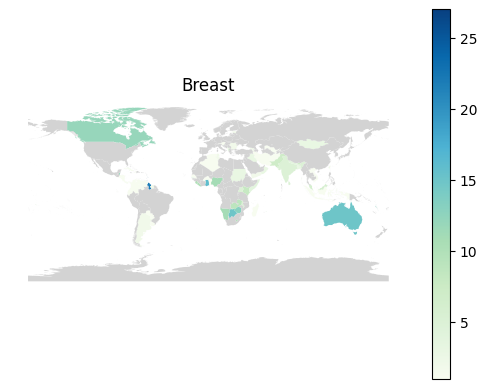

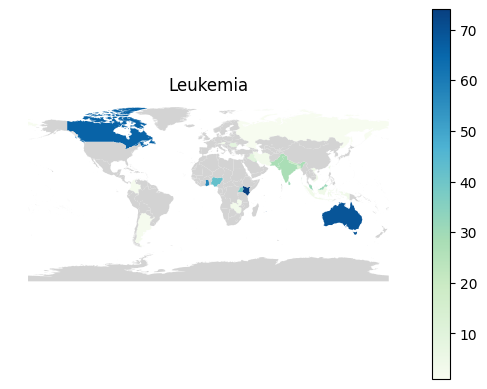

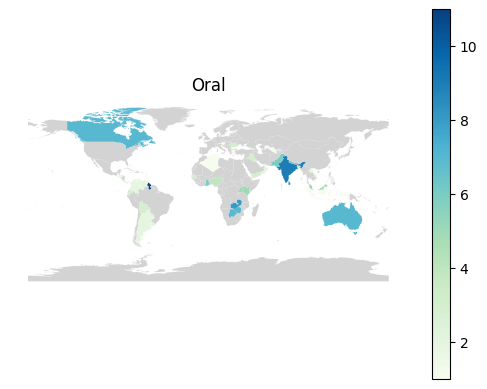

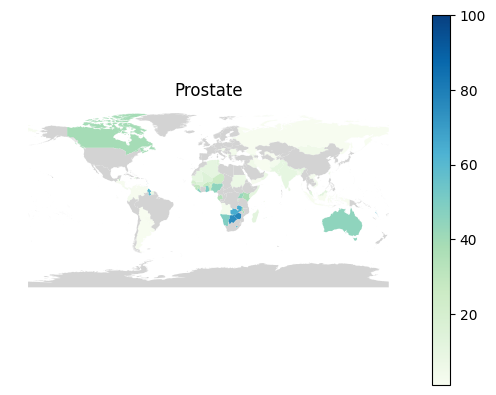

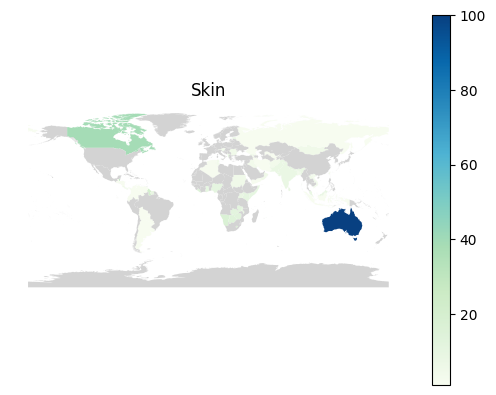

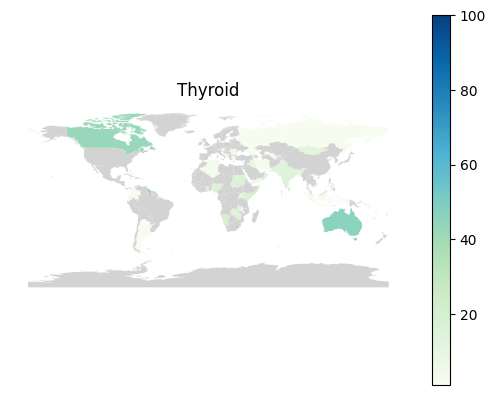

In [39]:
from pathlib import Path
world = gpd.read_file("../maps/countries.geojson")

input_dir = Path("../data/trends maps")
for csv_path in sorted(input_dir.glob("*.csv")):
    df_csv = pd.read_csv(csv_path)
    if "Tumor" in df_csv.columns:
        df_csv["Tumor"] = pd.to_numeric(df_csv["Tumor"], errors="coerce")

    merged_gdf = world.merge(df_csv, left_on="ADMIN", right_on="Country", how="left")

    # plt.figure(figsize=(14, 10))

    cmap = plt.get_cmap("GnBu")
    colore_zero = cmap(0)

    ax = merged_gdf.plot(
        column="Tumor",
        cmap="GnBu",
        legend=True,
        missing_kwds={"color": "lightgray", "label": "No data"}
    )

    # ax.set_facecolor("lightgrey")
    # fig = ax.get_figure()
    # fig.patch.set_facecolor("lightgrey")

    ax.axis("off")
    plt.savefig(f"../outputs/maps/{csv_path.stem}.png", bbox_inches='tight', dpi=600)
    ax.set_title(csv_path.stem.split("_")[1][0].upper() + csv_path.stem.split("_")[1][1:])
    plt.show()
# df = pd.read_csv("../data/geoMap.csv")
# df["Tumor"] = pd.to_numeric(df["Tumor"], errors="coerce")


# merged = world.merge(df, left_on="ADMIN", right_on="Country", how="left")

# plt.figure(figsize=(14, 10))
# merged.plot(
#     column="Tumor",
#     cmap="Reds",
#     legend=True,
#     missing_kwds={"color": "lightgrey", "label": "No data"}
# )
# plt.title("")
# plt.axis("off")
# plt.show()